In [79]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Reading the sales_data csv file, loading the dataset.
df = pd.read_excel("C:/Ai/Group Project Data-SFD Data-Toronto Police (1).xlsx")
df2 = df[['OCC_DOY', 'OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES','HOOD_158', 'NEIGHBOURHOOD_158']]

#把数据中的no specific area 清掉了
df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
df2.loc[:,'NEIGHBOURHOOD_158'] = df2['NEIGHBOURHOOD_158'].replace('NSA', np.nan)
df2=df2.dropna(subset=['HOOD_158','NEIGHBOURHOOD_158'])
df2.info()
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5706
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OCC_DOY            5643 non-null   int64 
 1   OCC_YEAR           5643 non-null   int64 
 2   OCC_MONTH          5643 non-null   object
 3   DEATH              5643 non-null   int64 
 4   INJURIES           5643 non-null   int64 
 5   HOOD_158           5643 non-null   object
 6   NEIGHBOURHOOD_158  5643 non-null   object
dtypes: int64(4), object(3)
memory usage: 352.7+ KB
OCC_DOY              0
OCC_YEAR             0
OCC_MONTH            0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
dtype: int64


In [35]:
#描述每一年里发生次数最多的月份和次数
df2.groupby('OCC_YEAR')[['OCC_MONTH']].describe(include='all')


OCC_MONTH                       
             count unique        top freq
OCC_YEAR                                 
2004           191     12        May   25
2005           262     12       July   33
2006           215     12       June   26
2007           207     12       July   26
2008           238     12  September   32
2009           252     12     August   37
2010           259     12       July   40
2011           227     12    October   31
2012           219     12    January   30
2013           204     12     August   34
2014           177     12    October   21
2015           288     12       June   40
2016           407     12     August   48
2017           392     12       July   44
2018           427     12        May   54
2019           492     12    October   57
2020           462     12     August   68
2021           409     12       July   51
2022           379     12       June   40

In [36]:
df3 = df2.groupby('OCC_YEAR')
df4=df2.groupby('OCC_MONTH')

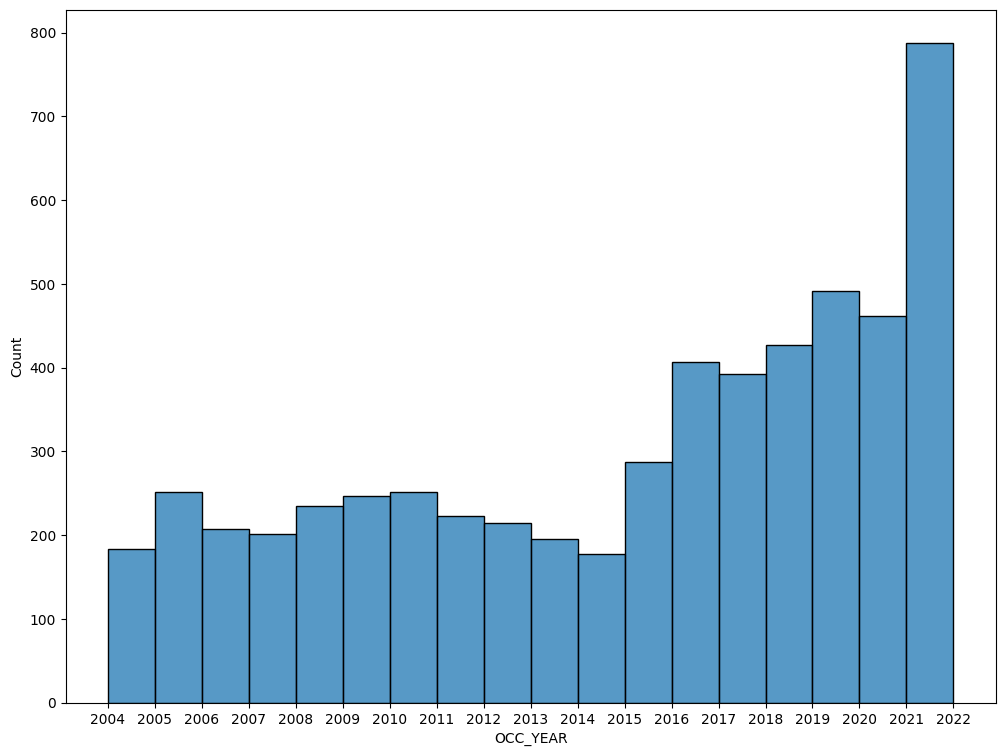

In [90]:
fig= plt.subplots(figsize=(12,9))
sns.histplot(
    data = df2,
    x = 'OCC_YEAR'
)
plt.xticks(range(2004,2023,1))
plt.show()